In [1]:
# https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./datasets_4123_6408_framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
data.drop('education', axis=1, inplace=True)

In [7]:
# renaming TenYearCHD to CHD
data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [8]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.14, random_state=0)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

# EDA

<AxesSubplot:xlabel='CHD', ylabel='age'>

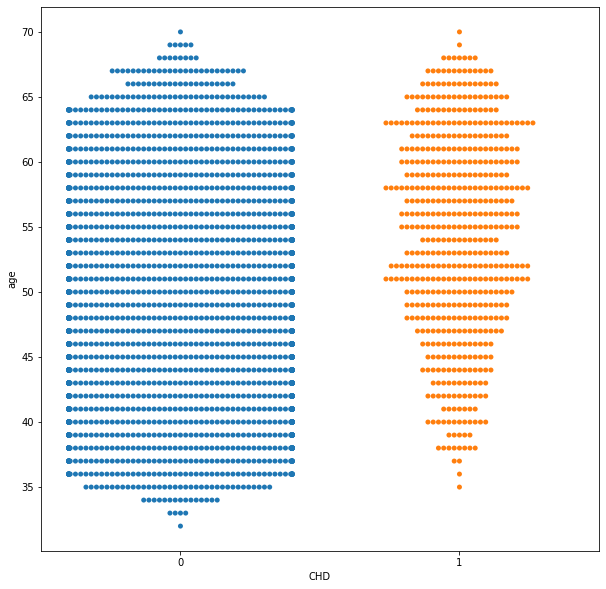

In [10]:
# age vs CHD
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data)

<AxesSubplot:xlabel='CHD', ylabel='age'>

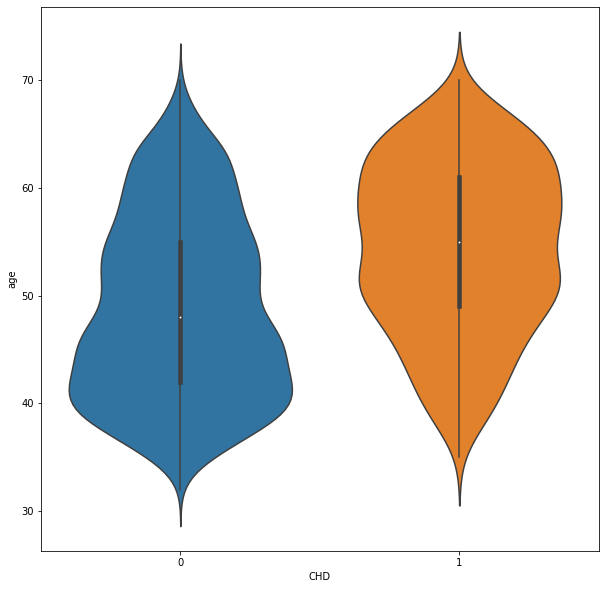

In [11]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data)

Violinplot tells that of age around 40-55 the most data have 0 risk

For age around 60-65, the most data have risk of disease

<AxesSubplot:xlabel='CHD', ylabel='age'>

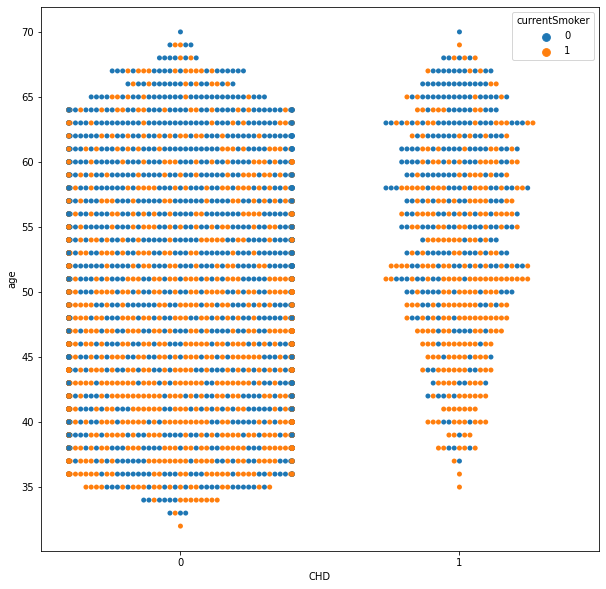

In [12]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data, hue='currentSmoker')

<AxesSubplot:xlabel='CHD', ylabel='age'>

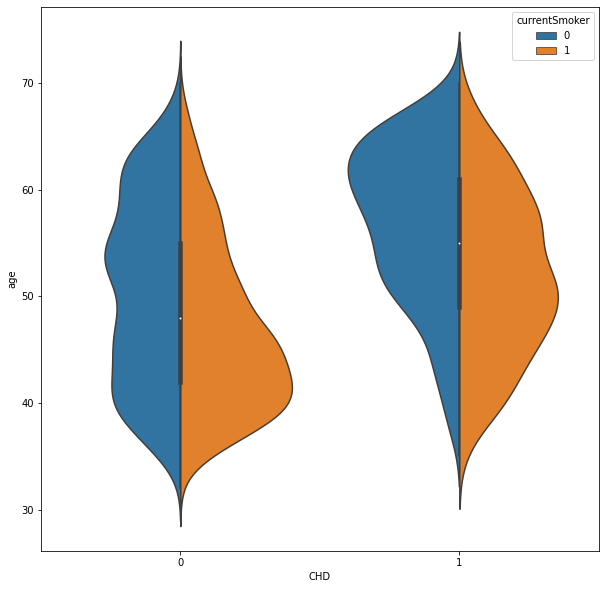

In [13]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data, hue='currentSmoker', split=True)

From this violinplot, we see that most of smokers having no risk are in age around 40 years

But most of non-smokers having risk are in age around 65-70 years
Also most smokers having risk are in age around 50 years

<AxesSubplot:xlabel='male', ylabel='count'>

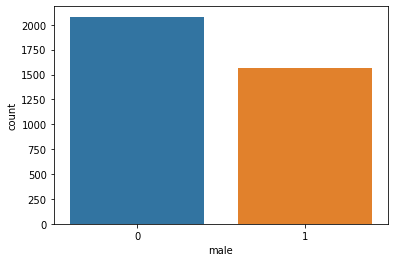

In [14]:
# male and female countplot
sns.countplot(x=train_data['male'])

<AxesSubplot:xlabel='male', ylabel='count'>

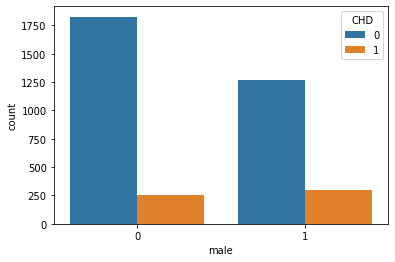

In [15]:
# male and female having disease or not
sns.countplot(x=train_data['male'], hue=train_data['CHD'])

Here from the above countplot, we see that most data are females

There are more females having no risk than males having no risk

There are slightly more males having risk than females having risk

In [16]:
train_data.iloc[:,:5]

,male,age,currentSmoker,cigsPerDay,BPMeds
1073,1,48,0,0.0,0.0
953,0,39,1,5.0,0.0
2584,0,43,1,1.0,0.0
3068,0,46,1,30.0,0.0
1826,0,38,0,0.0,0.0
...,...,...,...,...,...
1033,0,44,0,0.0,0.0
3264,0,51,1,2.0,0.0
1653,1,39,1,20.0,0.0
2607,0,57,0,0.0,0.0


<Figure size 1440x1080 with 0 Axes>

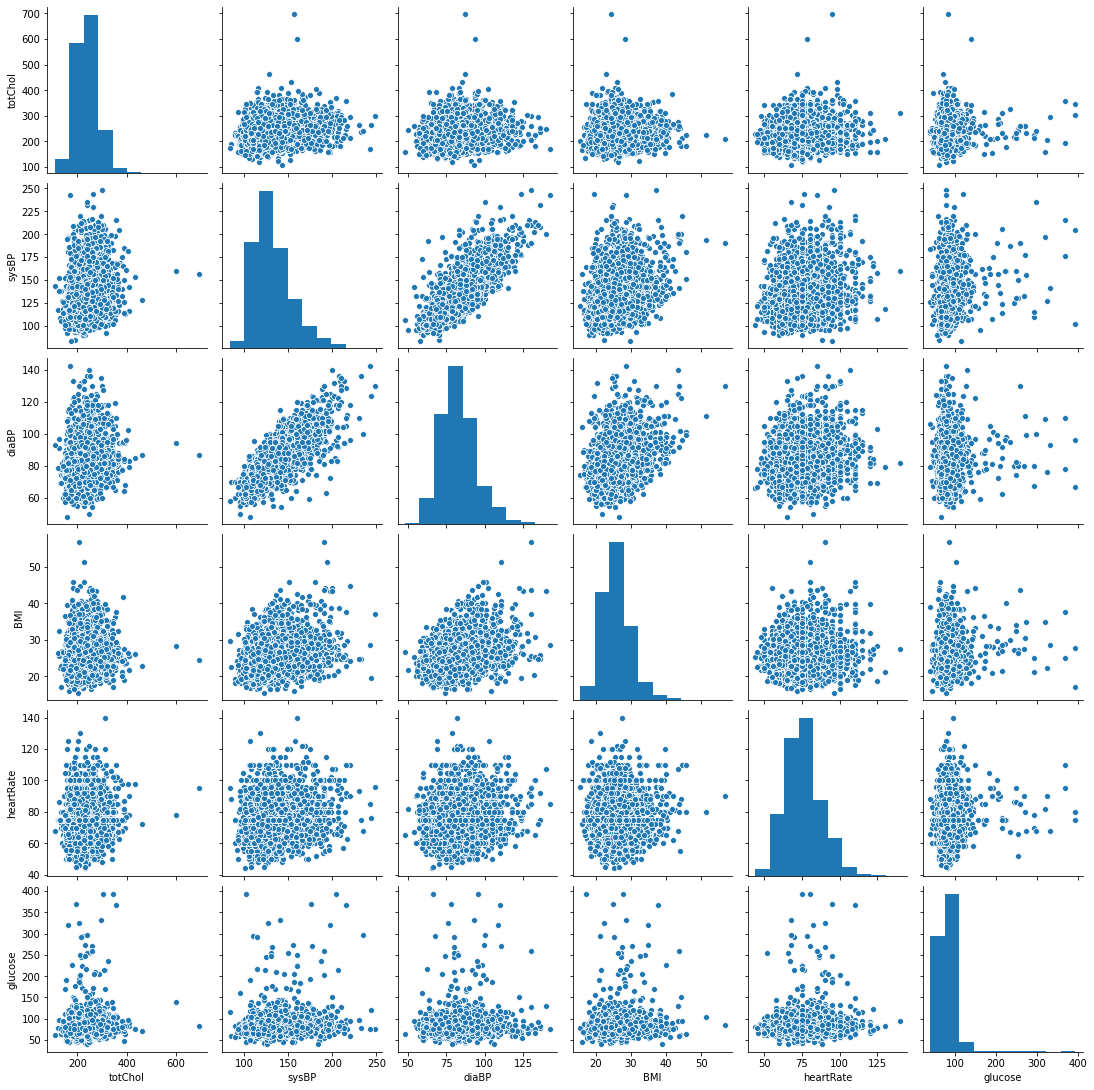

In [17]:
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'totChol': 'glucose'])

<AxesSubplot:>

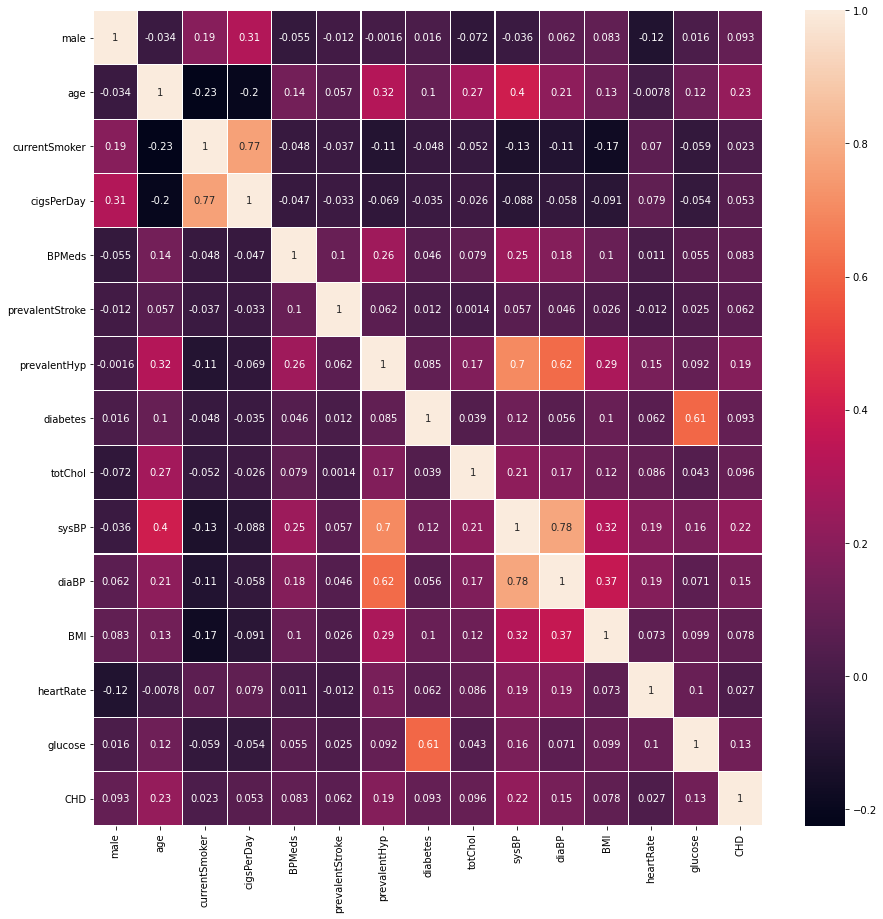

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.1)

From pairplot and heatmap we see that sysBP and diaBP are highly correlated

And currentSmoker and cigsPerDay are highly correlated

In [19]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

train_data.drop(features_to_drop, axis=1, inplace=True)

In [20]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1,48,0.0,0.0,0,0,0,181.0,153.0,29.34,103.0,88.0,0
953,0,39,5.0,0.0,0,0,0,170.0,137.5,27.35,67.0,70.0,0
2584,0,43,1.0,0.0,0,0,0,256.0,129.0,25.89,96.0,72.0,0
3068,0,46,30.0,0.0,0,0,0,196.0,114.0,21.01,60.0,69.0,0
1826,0,38,0.0,0.0,0,0,0,167.0,102.5,22.58,60.0,57.0,0


# Missing Values Checking

Missing values can be done before EDA or after EDA but before EDA it will impute or drop missing values for all features whether they are needed or not

But after EDA we choose the features which are needed and they only got imputed or had missing values processing

Also, the steps best for model are : EDA-> Preprocessing(Missing values, Outliers, Normalise etc.)-> Model Fitting and Prediction

In [21]:
missing_values_count = train_data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (train_data.shape[0])

print(max(missing_values_percent))

9.133296763576523


In [22]:
# maximum missing percentage is 9% approx so imputing values
print(missing_values_count)

cigsPerDay     25
BPMeds         46
totChol        42
BMI            18
heartRate       1
glucose       333
dtype: int64


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [24]:
new_train_data = pd.DataFrame(imputer.fit_transform(train_data))
new_train_data.columns = train_data.columns
new_train_data.index = train_data.index

In [25]:
train_data.isnull().sum()

male                 0
age                  0
cigsPerDay          25
BPMeds              46
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             42
sysBP                0
BMI                 18
heartRate            1
glucose            333
CHD                  0
dtype: int64

In [26]:
new_train_data.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
CHD                0
dtype: int64

In [27]:
new_train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1.0,48.0,0.0,0.0,0.0,0.0,0.0,181.0,153.0,29.34,103.0,88.0,0.0
953,0.0,39.0,5.0,0.0,0.0,0.0,0.0,170.0,137.5,27.35,67.0,70.0,0.0
2584,0.0,43.0,1.0,0.0,0.0,0.0,0.0,256.0,129.0,25.89,96.0,72.0,0.0
3068,0.0,46.0,30.0,0.0,0.0,0.0,0.0,196.0,114.0,21.01,60.0,69.0,0.0
1826,0.0,38.0,0.0,0.0,0.0,0.0,0.0,167.0,102.5,22.58,60.0,57.0,0.0


In [28]:
train_data = new_train_data.copy()

# Outliers Checking

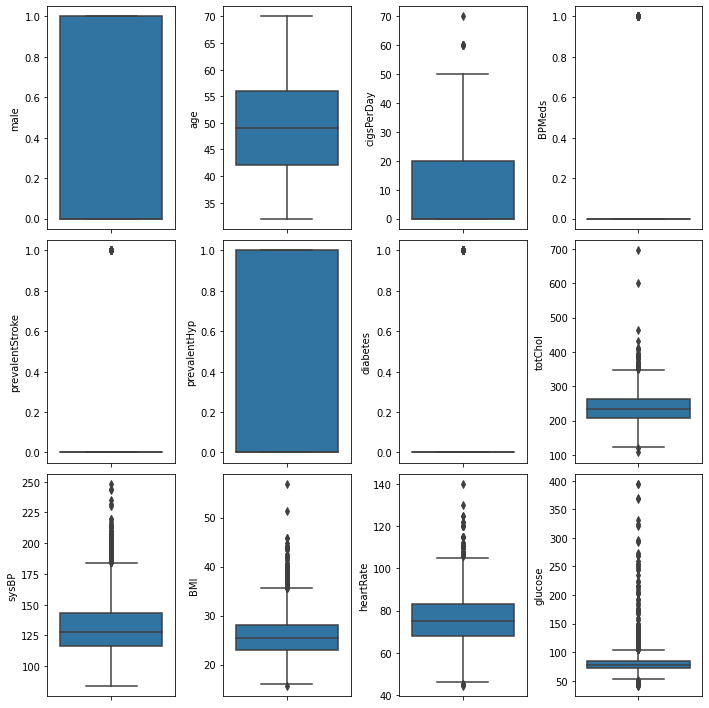

In [29]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Conclusion of Boxplot : 

Outliers in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [30]:
# Outliers handling
print(len(train_data[train_data['sysBP'] > 220]) + len(train_data[train_data['BMI'] > 43]) + len(
    train_data[train_data['heartRate'] > 125]) + len(train_data[train_data['glucose'] > 200]) + len(
    train_data[train_data['totChol'] > 450]))

# here we printed count of data that would be deleted to remove outliers in some columns

51


In [31]:
# deleting outliers

train_data = train_data[~(train_data['sysBP'] > 220)]
train_data = train_data[~(train_data['BMI'] > 43)]
train_data = train_data[~(train_data['heartRate'] > 125)]
train_data = train_data[~(train_data['glucose'] > 200)]
train_data = train_data[~(train_data['totChol'] > 450)]
print(train_data.shape)

(3597, 13)


# Normalisation Checking

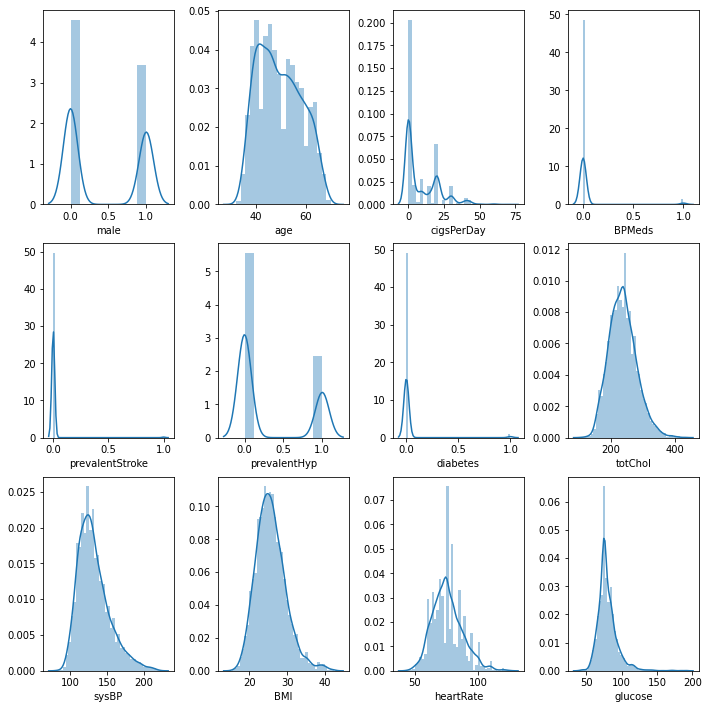

In [32]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in train_data.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [33]:
# normalise some features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
train_data[cols_to_standardise] = scaler.fit_transform(train_data[cols_to_standardise])

In [34]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1073,1.0,-0.175233,-0.756838,0.0,0.0,0.0,0.0,-1.285939,0.988513,0.911735,2.283404,0.593220,0.0
953,0.0,-1.224008,-0.333785,0.0,0.0,0.0,0.0,-1.541289,0.262151,0.407063,-0.735829,-0.693199,0.0
2584,0.0,-0.757886,-0.672228,0.0,0.0,0.0,0.0,0.455083,-0.136176,0.036802,1.696331,-0.550264,0.0
3068,0.0,-0.408294,1.781481,0.0,0.0,0.0,0.0,-0.937735,-0.839107,-1.200784,-1.322902,-0.764667,0.0
1826,0.0,-1.340538,-0.756838,0.0,0.0,0.0,0.0,-1.610930,-1.378020,-0.802627,-1.322902,-1.622279,0.0


# Model Fitting

## Test Data Preprocessing Similar to Train Data

In [35]:
# dropping unwanted features as in train data
test_data.drop(features_to_drop, axis=1, inplace=True)

# imputing missing values if any
imputer = SimpleImputer(strategy='most_frequent')
new_test_data = pd.DataFrame(imputer.fit_transform(test_data))
new_test_data.columns = test_data.columns
new_test_data.index = test_data.index

test_data = new_test_data.copy()

In [36]:
scaler = StandardScaler()
test_data[cols_to_standardise] = scaler.fit_transform(test_data[cols_to_standardise])

In [37]:
test_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
1465,0.0,-0.312638,0.862555,0.0,0.0,1.0,0.0,1.996422,1.308089,1.714420,1.612541,0.221368,0.0
302,0.0,0.631835,-0.736813,0.0,0.0,0.0,0.0,-0.377000,-0.674245,0.174296,1.192506,-0.266243,0.0
87,0.0,1.340189,-0.656845,0.0,0.0,1.0,0.0,2.019026,3.173816,3.390976,-1.579730,-0.144341,0.0
843,0.0,-0.430697,-0.736813,0.0,0.0,0.0,0.0,-0.263980,-0.744210,0.964036,-1.327709,-0.469415,0.0
1431,1.0,-1.257111,-0.736813,0.0,0.0,0.0,0.0,-0.535228,-0.091205,-0.843707,0.352434,-0.144341,0.0


## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [39]:
X_train = train_data.loc[:,train_data.columns != 'CHD']
y_train = train_data.loc[:,'CHD']
X_test = test_data.loc[:, test_data.columns !='CHD']
y_test = test_data.loc[:, 'CHD']
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
accuracy_score(y_pred_log, y_test)

0.8535353535353535

In [42]:
confusion_matrix(y_pred_log, y_test)

array([[500,  87],
       [  0,   7]])

In [43]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92       587
         1.0       0.07      1.00      0.14         7

    accuracy                           0.85       594
   macro avg       0.54      0.93      0.53       594
weighted avg       0.99      0.85      0.91       594



In [44]:
log_reg.score(X_train, y_train)

0.8568251320544898

# Decision Tree Classifier

# Random Forest Classifier